In [1]:
!pip install opencv-python
!pip install imutils
!pip install numpy
!pip install pytesseract
!pip install matplotlib
!pip install termcolor

In [2]:
!pip install pandas
!pip install xlrd

In [3]:
import cv2
import imutils
import numpy as np
import pytesseract
from matplotlib import pyplot as plt

In [4]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

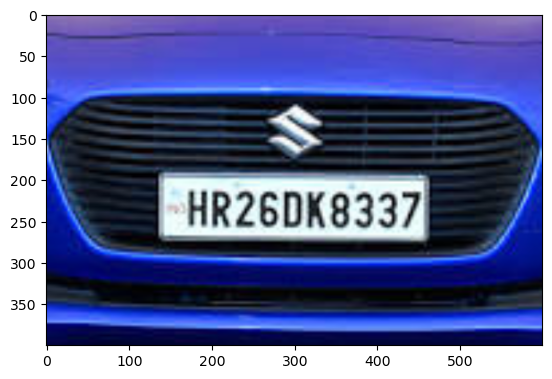

In [5]:
img = cv2.imread('C:\Users\aksha\Downloads\SGP\download (1).jfif',cv2.IMREAD_COLOR)
img = cv2.resize(img, (600,400))
cv2.imshow("original image", img)
plt.imshow(img)
plt.show()

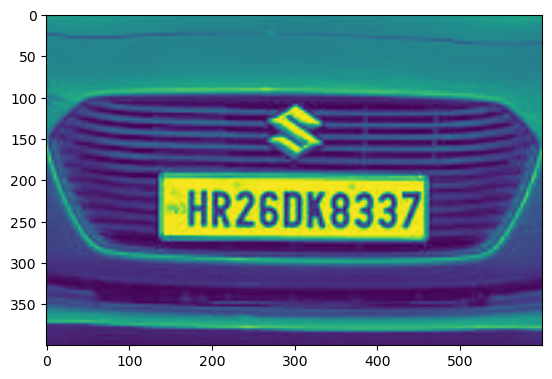

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
cv2.imshow("greyed image", gray)
plt.imshow(gray)
plt.show()

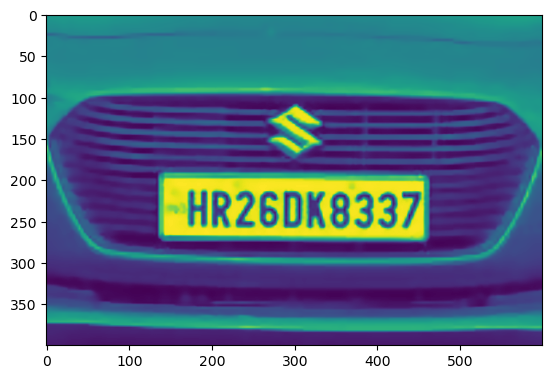

In [7]:
gray = cv2.bilateralFilter(gray, 13, 15, 15) 
cv2.imshow("smoothened image", gray)
plt.imshow(gray)
plt.show()

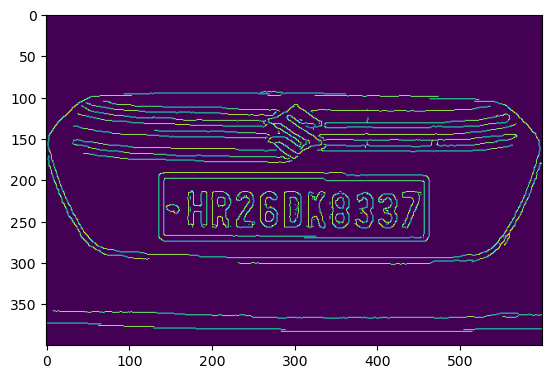

In [8]:
edged = cv2.Canny(gray, 30, 200)
cv2.imshow("edged image", edged)
plt.imshow(edged)
plt.show()

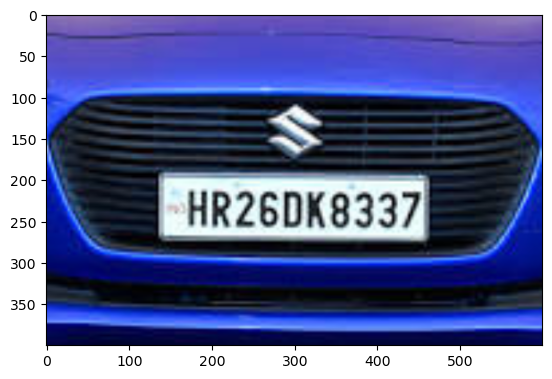

In [9]:
contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
cv2.imshow("contours",img)
plt.imshow(img)
plt.show()

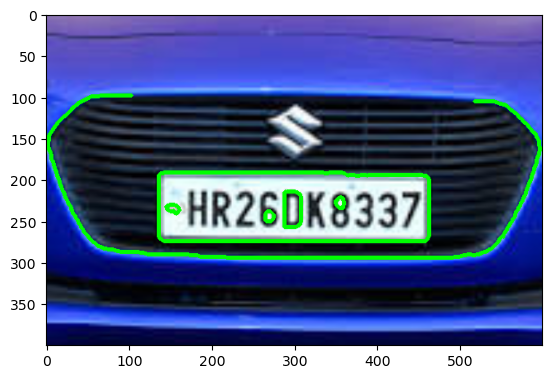

In [10]:
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None
cv2.drawContours(img,contours,-1,(0,255,0),3)
cv2.imshow("Top 30 contours",img)
plt.imshow(img)
plt.show()


In [11]:
for c in contours:
    
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
 
    if len(approx) == 4:
        screenCnt = approx
        break

if screenCnt is None:
    detected = 0
    print ("No contour detected")
else:
     detected = 1

if detected == 1:
    cv2.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)

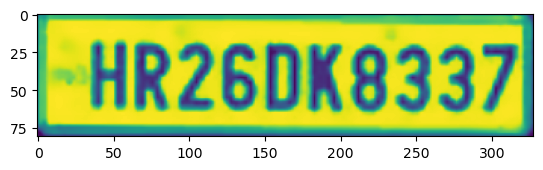

In [12]:
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]
cv2.imshow("Cropped",Cropped)
plt.imshow(Cropped)
plt.show()
cv2.destroyAllWindows()

In [13]:
from termcolor import colored
text = pytesseract.image_to_string(Cropped, config='--psm 11')
print("Detected license plate Number is:",text)
print(colored(text, 'red', attrs=['bold']))
img = cv2.resize(img,(500,300))
Cropped = cv2.resize(Cropped,(400,200))
cv2.imshow('car',img)
cv2.imshow('Cropped',Cropped)
cv2.destroyAllWindows()

Detected license plate Number is: HR26DK8337)

HR26DK8337)



In [14]:
str = ''.join(letter for letter in text if letter.isalnum())
print(str)

HR26DK8337


In [29]:
import pandas as pd

# Load the xlsx file
excel_data = pd.read_excel("C:\\Users\\aksha\\Downloads\\SGP\\Vehicles2.xlsx")
# Read the values of the file in the dataframe
data = pd.DataFrame(excel_data, columns=['Number Plate','Name','Address','Id','State'])
# Print the content
print("The content of the file is:\n", data)

The content of the file is:
   Number Plate           Name    Address  Id    State
0   MH12DE1433  Akshat Parikh   Vadodara   1      NaN
1       284FH8    Devraj Heda  Ahmedabad   2      NaN
2   MH20EE0943  Harita Parikh     Mumbai   3      NaN
3      CZ20FSE    Miten Patel       Pune   4      NaN
4      EVSROCK  Sahil Vanjara    Chennai   5      NaN
5       KSC124    Khush Patel      Surat   6      NaN
6       YTC125       Om Patel      Anand   7      NaN
7   HR26DK8337  Akshat Parikh    Gurugam   8  Haryana


In [31]:
import pandas as pd
xls = pd.ExcelFile("C:\\Users\\aksha\\Downloads\\SGP\\Vehicles2.xlsx")
workbook = xls.sheet_names

for tab in workbook:
    df = pd.read_excel(xls,tab)
    try:
        agg = df[df['Number Plate'].str.contains(str,na=False)]
        final = agg
        print(final)
    except KeyError:
        print("Not found")

  Number Plate           Name  Address  Id    State
7   HR26DK8337  Akshat Parikh  Gurugam   8  Haryana


In [32]:
df = final
df=pd.DataFrame(df)
def highlight_number(row):
    return [
        'background-color: Cyan; color: Black' 
        for cell in row
    ]

df.style \
  .apply(highlight_number) \
  .set_caption('The Vehicle is Registration details') \
  .set_properties(padding="10px", border='1px solid black') 

,Number Plate,Name,Address,Id,State
7,HR26DK8337,Akshat Parikh,Gurugam,8,Haryana
